# Nama: Aprilia Tri Widiyastuti
# Kompi: 23
# No_id: SC62312

# 1. Data Preparation

Untuk menghubungkan Google Colab dengan Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Pandas Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

Membaca file CSV yang terletak di Google Drive menggunakan perpustakaan pandas di lingkungan Google Colab dan menampilkan beberapa isi dari variabel tersebut di output sel.



In [ ]:
data = pd.read_csv('/content/drive/My Drive/DataSet/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


- ***Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.***

**isnull()** dan **isna()** sebuah perintah dalam pandas yang digunakan untuk menghitung jumlah nilai null atau NaN (Not a Number) dalam setiap kolom dari DataFrame data.

Fungsi **sum()** untuk menghitung jumlah True (nilai null) di setiap kolom ketika dipanggil pada DataFrame boolean.

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- ***Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.***

Fungsi **duplicated()** untuk mengidentifikasi baris-baris yang merupakan duplikat/ada yang memiliki Id yang sama. Fungsi **sum()** untuk menghitung jumlah True (nilai null) di setiap kolom ketika dipanggil pada DataFrame boolean.

In [ ]:
data.duplicated().sum()

723

Karena data duplicated terlalu banyak, sedangkan kalo didrop bakal menghilangkan banyak data. Maka dibawah ini cara mengatasi data duplicated dengan cara menambahkan kolom baru yakni 'ID'. Sehingga masing-masing data memiliki nilai unik dan tidak duplicated lagi.

In [ ]:
data.insert(0, 'ID', range(1, len(data) + 1))
print(data)

        ID  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0        1   52    1   0       125   212    0        1      168      0   
1        2   53    1   0       140   203    1        0      155      1   
2        3   70    1   0       145   174    0        1      125      1   
3        4   61    1   0       148   203    0        1      161      0   
4        5   62    0   0       138   294    1        1      106      0   
...    ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
1020  1021   59    1   1       140   221    0        1      164      1   
1021  1022   60    1   0       125   258    0        0      141      1   
1022  1023   47    1   0       110   275    0        0      118      1   
1023  1024   50    0   0       110   254    0        0      159      0   
1024  1025   54    1   0       120   188    0        1      113      0   

      oldpeak  slope  ca  thal  target  
0         1.0      2   2     3       0  
1         3.1      0   0     

In [ ]:
data.duplicated().sum()

0

- ***Outlier: Memeriksa outlier dan menangani outlier jika ada.***

fungsi **info()** untuk menampilkan informasi pada dataset.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1025 non-null   int64  
 1   age       1025 non-null   int64  
 2   sex       1025 non-null   int64  
 3   cp        1025 non-null   int64  
 4   trestbps  1025 non-null   int64  
 5   chol      1025 non-null   int64  
 6   fbs       1025 non-null   int64  
 7   restecg   1025 non-null   int64  
 8   thalach   1025 non-null   int64  
 9   exang     1025 non-null   int64  
 10  oldpeak   1025 non-null   float64
 11  slope     1025 non-null   int64  
 12  ca        1025 non-null   int64  
 13  thal      1025 non-null   int64  
 14  target    1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


Membagi setiap kolom dalam variable yakni numericals (untuk angka) dan categoricals (untuk string)

In [ ]:
categoricals = ['']

numericals = ['ID', 'age',	'sex',	'cp',	'trestbps',	'chol',	'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
              'slope', 'ca', 'thal', 'target']

Menampilkan boxplot berdampingan, untuk menunjukkan distribusi data dari variabel numerik yang ada dalam dataset. Dengan ini bisa melihat kolom mana yang memiliki data outlier.

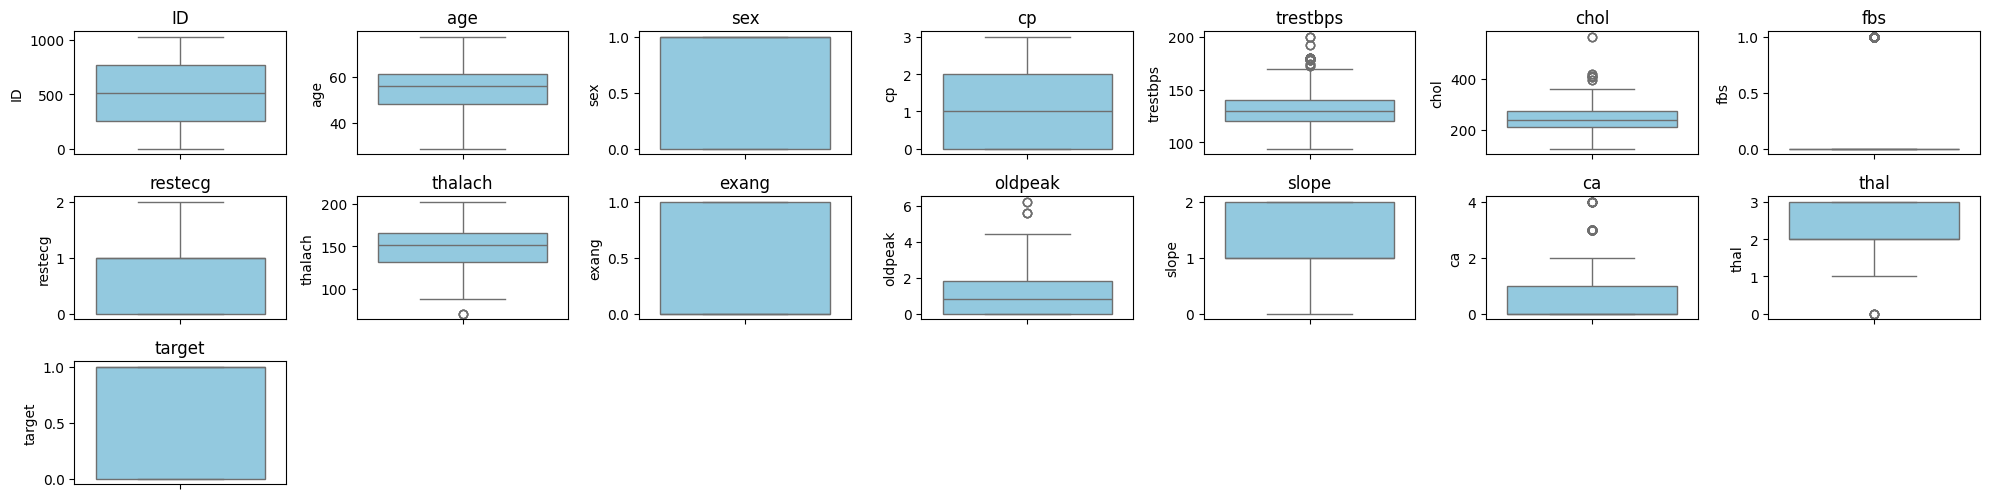

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(0, len(numericals)):
    # Menyesuaikan ukuran subplots agar tampilan lebih jelas
    plt.subplot(6, 7, i+1)

    # Menambahkan judul pada setiap plot
    plt.title(numericals[i])

    # Menambahkan label sumbu
    plt.xlabel('')

    sns.boxplot(y=data[numericals[i]], color='skyblue')

# Menyusun layout plot
plt.tight_layout()

# Menampilkan plot
plt.show()

Dibawah ini untuk mengatasi outlier dari masing-masing kolom.

In [ ]:
# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    data[column] = np.where(df[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(df[column] > upper_bound, upper_bound, data[column])

    # Konversi kolom menjadi int
    data[column] = data[column].astype(int)

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['trestbps', 'chol', 'fbs', 'thalach', 'ca', 'thal']
for column in columns_with_outliers:
    handle_outliers_iqr(data, column)

# Cetak DataFrame setelah outlier ditangani
data

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,2,53,1,0,140,203,0,0,155,1,3.1,0,0,3,0
2,3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,5,62,0,0,138,294,0,1,106,0,1.9,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


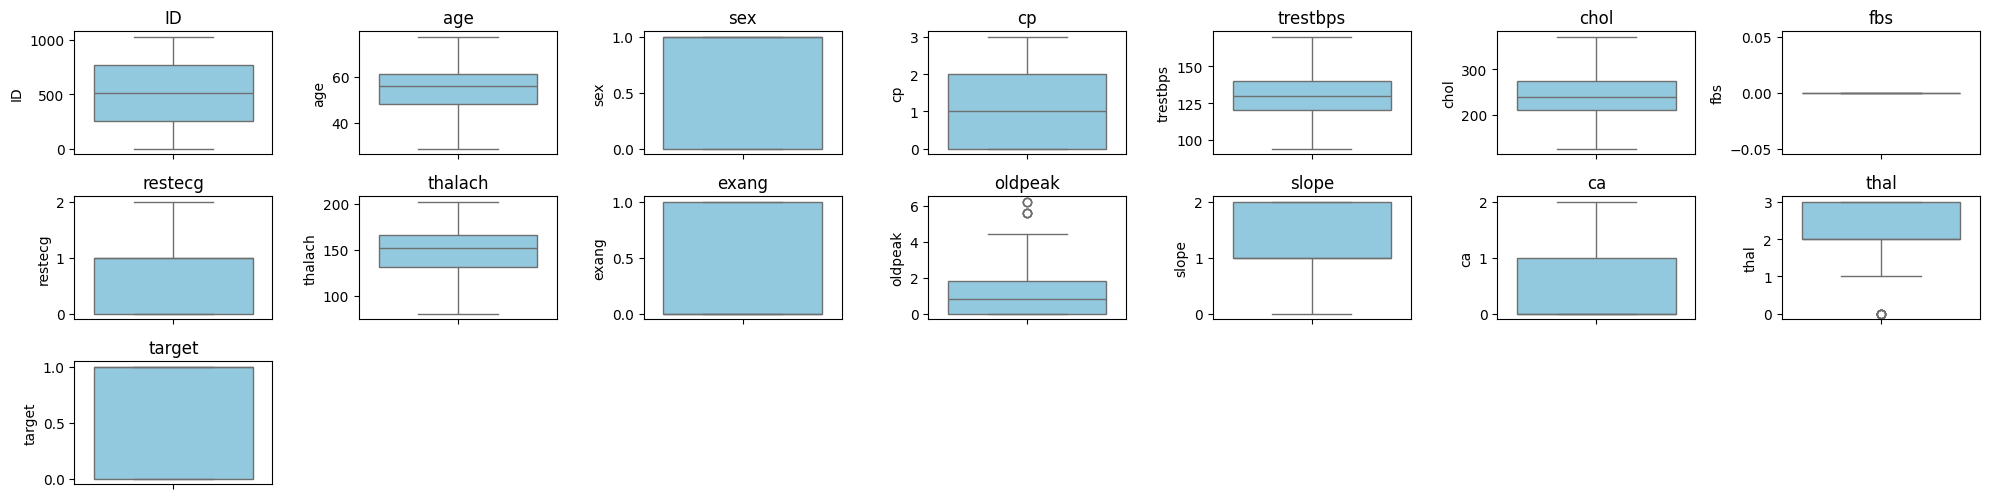

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(0, len(numericals)):
    # Menyesuaikan ukuran subplots agar tampilan lebih jelas
    plt.subplot(6, 7, i+1)

    # Menambahkan judul pada setiap plot
    plt.title(numericals[i])

    # Menambahkan label sumbu
    plt.xlabel('')

    sns.boxplot(y=data[numericals[i]], color='skyblue')

# Menyusun layout plot
plt.tight_layout()

# Menampilkan plot
plt.show()

Berikut cara mengatasi Kolom oldpeak bertype float dan kolom thal tidak bisa handling outlier menggunakan int

In [ ]:
# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    data[column] = np.where(df[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(df[column] > upper_bound, upper_bound, data[column])

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = ['oldpeak', 'thal']
for column in columns_with_outliers:
    handle_outliers_iqr(data, column)

# Cetak DataFrame setelah outlier ditangani
data

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,1,0,125,212,0,1,168,0,1.0,2,2,3.0,0
1,2,53,1,0,140,203,0,0,155,1,3.1,0,0,3.0,0
2,3,70,1,0,145,174,0,1,125,1,2.6,0,0,3.0,0
3,4,61,1,0,148,203,0,1,161,0,0.0,2,1,3.0,0
4,5,62,0,0,138,294,0,1,106,0,1.9,1,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2.0,1
1021,1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3.0,0
1022,1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2.0,0
1023,1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2.0,1


Menggunakan bloxpot untuk hasil dari handling outlier. Terlihat sudah tidak ada data yang mengandung outlier

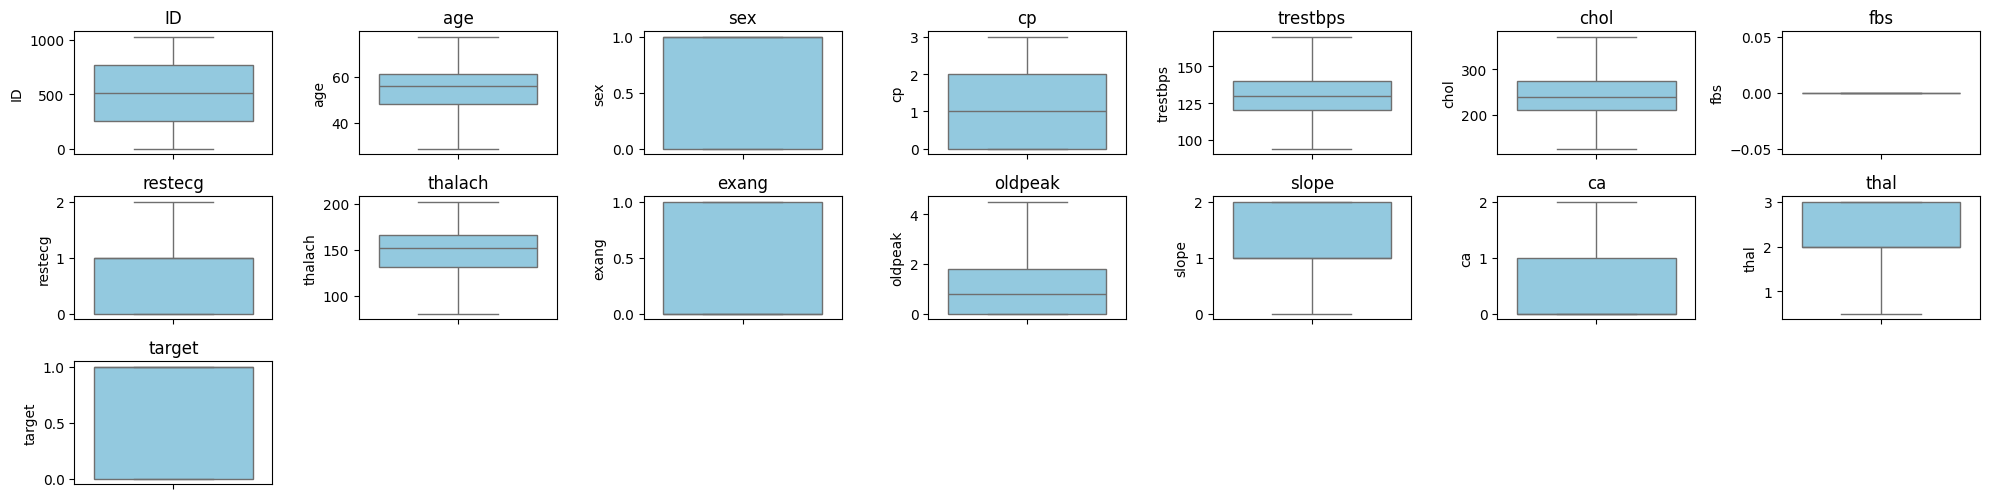

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(0, len(numericals)):
    # Menyesuaikan ukuran subplots agar tampilan lebih jelas
    plt.subplot(6, 7, i+1)

    # Menambahkan judul pada setiap plot
    plt.title(numericals[i])

    # Menambahkan label sumbu
    plt.xlabel('')

    sns.boxplot(y=data[numericals[i]], color='skyblue')

# Menyusun layout plot
plt.tight_layout()

# Menampilkan plot
plt.show()

- ***Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.***

Menghitung jumlah kategori dalam kolom yang dijadikan target dalam dataset. Terlihat bahwa data tidak seimbang antara jumlah data yang 0 dan 1.

In [ ]:
class_counts = data['target'].value_counts()

print("Jumlah sampel dalam setiap kelas:")
print(class_counts)

Jumlah sampel dalam setiap kelas:
target
1    526
0    499
Name: count, dtype: int64


Melihat jumlah kategori dalam kolom yang dijadikan target dalam dataset dengan menggunakan visualiasi data

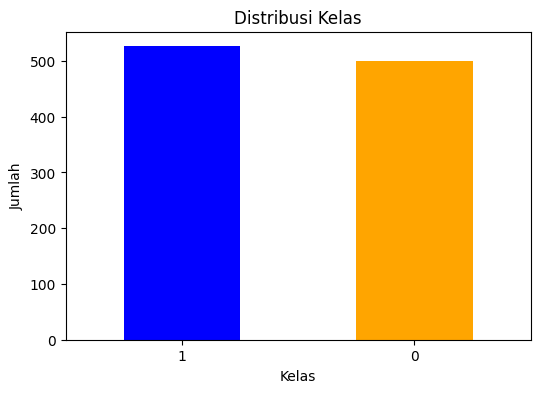

In [ ]:
# Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
data['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


Dibawah ini syntak untuk mengecek apakah oversampling diperlukan untuk menangani ketidakseimbangan data target dalam dataset, jika iya maka oversampling akan dilakukan. Output yang ditampilkan adalah dataset yang telah di-resample (jika oversampling dilakukan) atau dataset asli (jika tidak ada oversampling yang dilakukan)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# cek keseimbangan kelas
class_counts = data['target'].nunique()
print("target :", class_counts)

# menggunakan metode oversampling untuk atasi imbalance
if class_counts > 1:  # jika ada lebih dari 1 kelas unik
    # Lakukan oversampling
    oversampler = RandomOverSampler(sampling_strategy='auto')
    X_resampled, y_resampled = oversampler.fit_resample(data.drop('target', axis=1), data['target'])

    print("Keseimbangan setelah oversampling:")
    print(pd.Series(y_resampled).value_counts())

    # Gabungkan kembali dataset yang sudah di-resample
    data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=data.columns[:-1]), pd.Series(y_resampled, name='target')], axis=1)
else:
    data_resampled = data.copy()

data_resampled.head()


target : 2
Keseimbangan setelah oversampling:
target
0    526
1    526
Name: count, dtype: int64


,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,1,0,125,212,0,1,168,0,1.0,2,2,3.0,0
1,2,53,1,0,140,203,0,0,155,1,3.1,0,0,3.0,0
2,3,70,1,0,145,174,0,1,125,1,2.6,0,0,3.0,0
3,4,61,1,0,148,203,0,1,161,0,0.0,2,1,3.0,0
4,5,62,0,0,138,294,0,1,106,0,1.9,1,2,2.0,0


- ***Feature encoding: Melakukan feature encoding jika diperlukan.***

Feature encoding tidak diperlukan karena tidak ada nilai categorical yang perlu diubah menjadi numerik/kolom angka.

# 2. Exploratory Data Analysis (EDA)

- ***Mengelaborasi features dan tipe data (nominal, ordinal, numerical)***

Type data yang ada didataset

In [ ]:
set(data.dtypes)

{dtype('int64'), dtype('float64')}

fungsi **info()** untuk menampilkan informasi pada dataset.
1. Data berisi 14 kolom dan 1024 baris
2. Data tersebut hanya terdapat 2 type yakni int dan float

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1025 non-null   int64  
 1   age       1025 non-null   int64  
 2   sex       1025 non-null   int64  
 3   cp        1025 non-null   int64  
 4   trestbps  1025 non-null   int64  
 5   chol      1025 non-null   int64  
 6   fbs       1025 non-null   int64  
 7   restecg   1025 non-null   int64  
 8   thalach   1025 non-null   int64  
 9   exang     1025 non-null   int64  
 10  oldpeak   1025 non-null   float64
 11  slope     1025 non-null   int64  
 12  ca        1025 non-null   int64  
 13  thal      1025 non-null   float64
 14  target    1025 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 120.2 KB


Pengelompokan dataset berdasarkan jenis datanya. Numericals untuk int dan nominals untuk data yang boolean/biner

In [ ]:
nominals = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numericals = ['ID', 'age', 'trestbps',	'chol',	'thalach', 'oldpeak']

- ***Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus***

Penggunaan Mean, Median, Modus:
1. Mean: Mean digunakan untuk mencari rata-rata dari sebuah dataset dengan syntak **data.mean()**. Mean biasanya digunakan untuk data numerik. Cocok digunakan ketika data memiliki distribusi normal, yakni sebagian besar data lebih dekat dengan nilai rata-rata, sementara jumlah yang semakin sedikit data yang jauh dari nilai rata-rata. Mean sensitif terhadap outlier, karena outlier menyebabkan kenaikan yang signifikan dalam nilai rata-rata dari dataset.
2. Median: Median merupakan nilai tengah dalam dataset yang telah diurutkan dengan syntak **data['nama_kolom'].median()**. Mean biasanya digunakan untuk data numerik. Median tidak terlalu dipengaruhi oleh outlier, karena median adalah nilai tengah dari dataset yang diurutkan. Oleh karena itu, median sering digunakan ketika distribusi data tidak normal.
3. Modus: Modus adalah nilai yang paling sering muncul dalam dataset yang bisa memberikan wawasan tentang trend frekuensi data. Biasanya digunakan untuk data kategorikal atau nominal. Syntak untuk mencari modus **stats.mode(data)**

In [ ]:
summary_statistics = {
    'Mean': data[numericals].mean(),
    'Median': data[numericals].median(),
    'Modus': data[numericals].mode()
}

# Tampilkan hasil
print("\nMean median modus:")
for col in numericals:
    print("\n", col)
    print("Mean: ", summary_statistics['Mean'][col], "\n Median: ", summary_statistics['Median'][col], "\n Q3: ",
          "\n Modus: ", summary_statistics['Modus'][col])


Mean median modus:

 ID
Mean:  513.0 
 Median:  513.0 
 Q3:  
 Modus:  0          1
1          2
2          3
3          4
4          5
        ... 
1020    1021
1021    1022
1022    1023
1023    1024
1024    1025
Name: ID, Length: 1025, dtype: int64

 age
Mean:  54.43414634146342 
 Median:  56.0 
 Q3:  
 Modus:  0       58.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1020     NaN
1021     NaN
1022     NaN
1023     NaN
1024     NaN
Name: age, Length: 1025, dtype: float64

 trestbps
Mean:  131.26048780487804 
 Median:  130.0 
 Q3:  
 Modus:  0       120.0
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1020      NaN
1021      NaN
1022      NaN
1023      NaN
1024      NaN
Name: trestbps, Length: 1025, dtype: float64

 chol
Mean:  244.98146341463413 
 Median:  240.0 
 Q3:  
 Modus:  0       204.0
1       234.0
2         NaN
3         NaN
4         NaN
        ...  
1020      NaN
1021      NaN
1022      NaN
1023      NaN
1024      NaN
Name: chol

- ***Menemukan dan mendeskripsikan statistical five summaries***

Fungsi **Describe()** digunakan untuk menampilkan deskriptif statistik data. Hanya kolom yang bertipe numerik(int) yang akan ditampilkan statistiknya.
1. Kolom ID merupakan nilai unik dari setiap baris.
2. Kolom sex, cp, fbs, restecg, exang, slope, ca, thal, target merupakan kolom boolean/biner
3. Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom.
4. Kolom age, trestbps, chol memiliki distribusi simetris antara mean dan median 50%.
5. Kolom thalach median 50% memiliki distribusi cenderung condong ke kanan (positif skew).

In [ ]:
data.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,54.434146,0.695610,0.942439,131.260488,244.981463,0.0,0.529756,149.153171,0.336585,1.062244,1.385366,0.651707,2.327317,0.513171
std,296.036315,9.072290,0.460373,1.029641,16.532208,47.746162,0.0,0.527878,22.881210,0.472772,1.141865,0.617755,0.811694,0.609123,0.500070
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,257.000000,48.000000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,513.000000,56.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,769.000000,61.000000,1.000000,2.000000,140.000000,275.000000,0.0,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,1025.000000,77.000000,1.000000,3.000000,170.000000,371.000000,0.0,2.000000,202.000000,1.000000,4.500000,2.000000,2.000000,3.000000,1.000000


- ***Mendeskripsikan distribusi data***

1. Kolom age merupakan distribusi bimodal yang memiliki 2 puncak.
2. Kolom thalach merupakan distribusi skewed right (miring ke kanan)
3. Kolom trestbps merupakan distribusi Normal.
4. Kolom chol merupakan distribusi skewed left (miring ke kiri)
5. Kolom oldpeak memiliki distribusi data simetris, namun tidak mengikuti kurva normal.

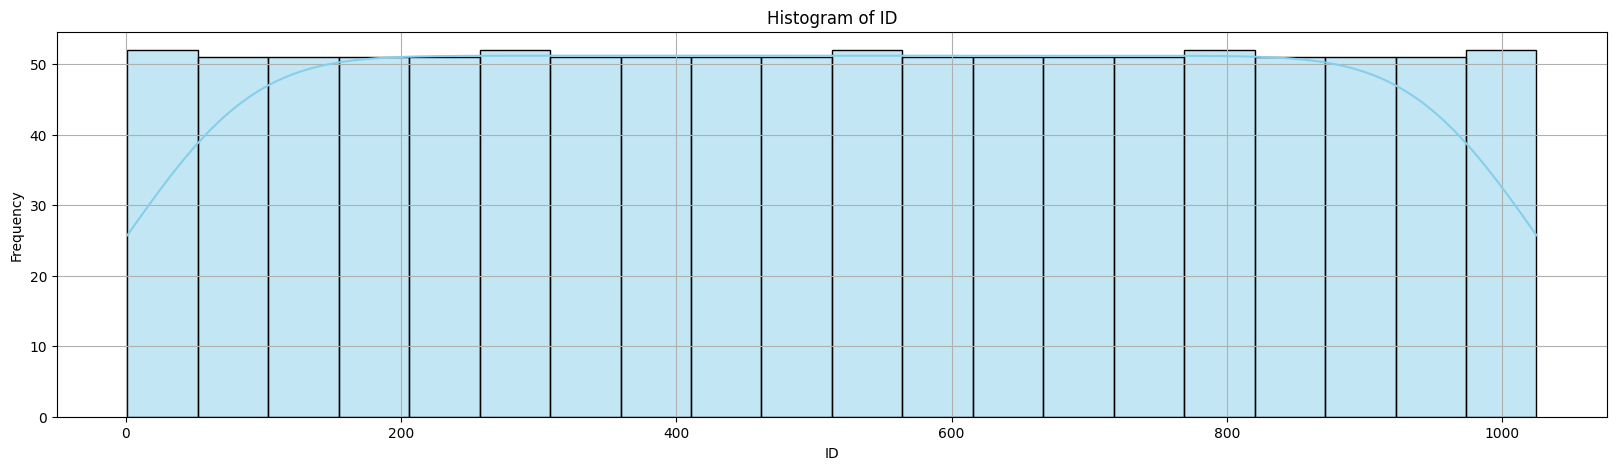

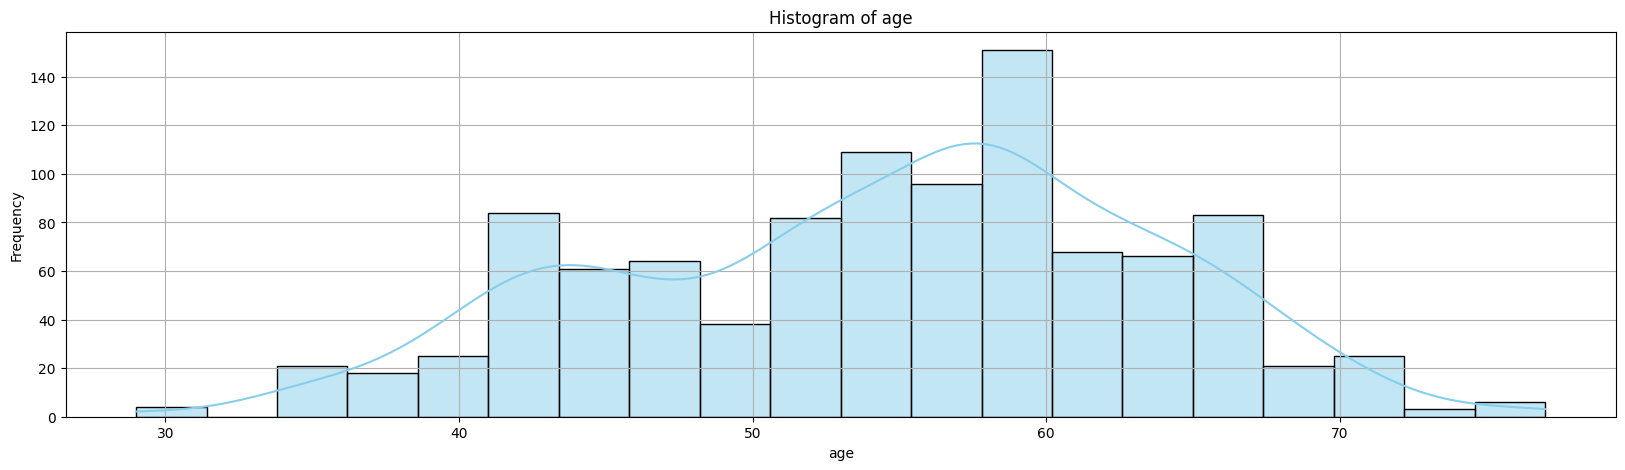

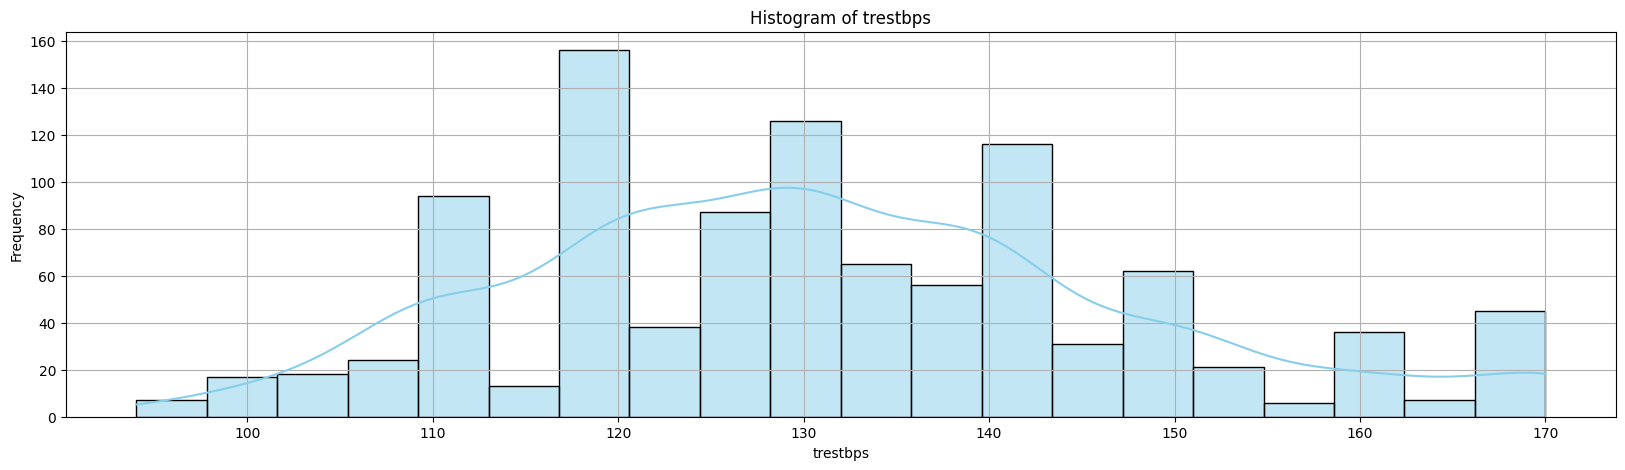

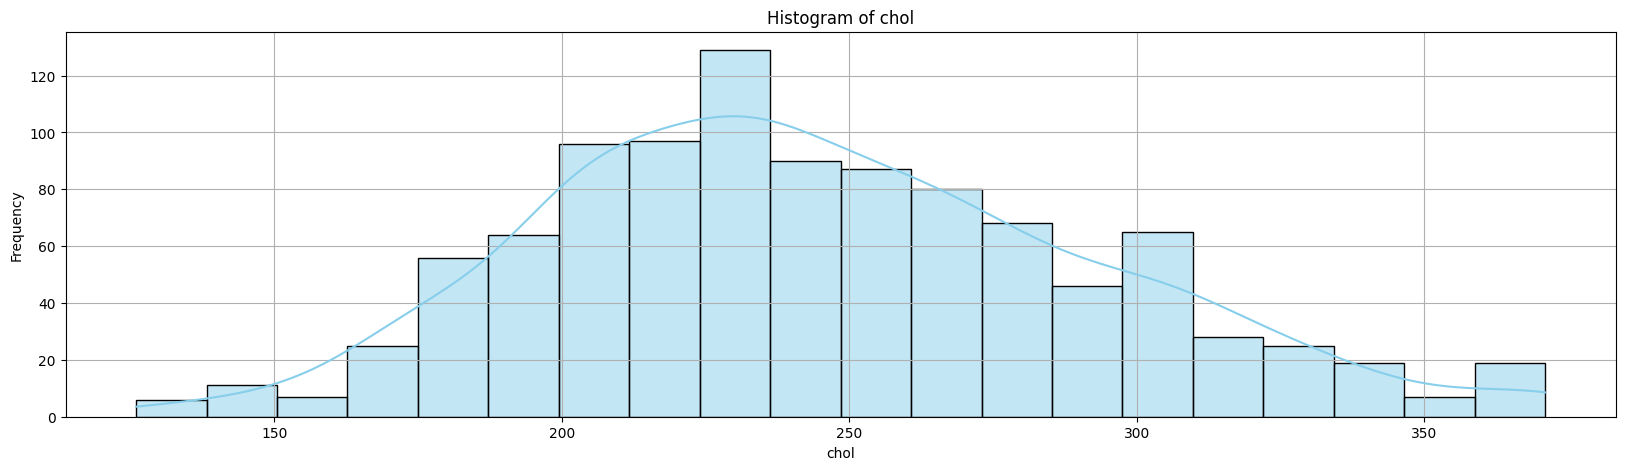

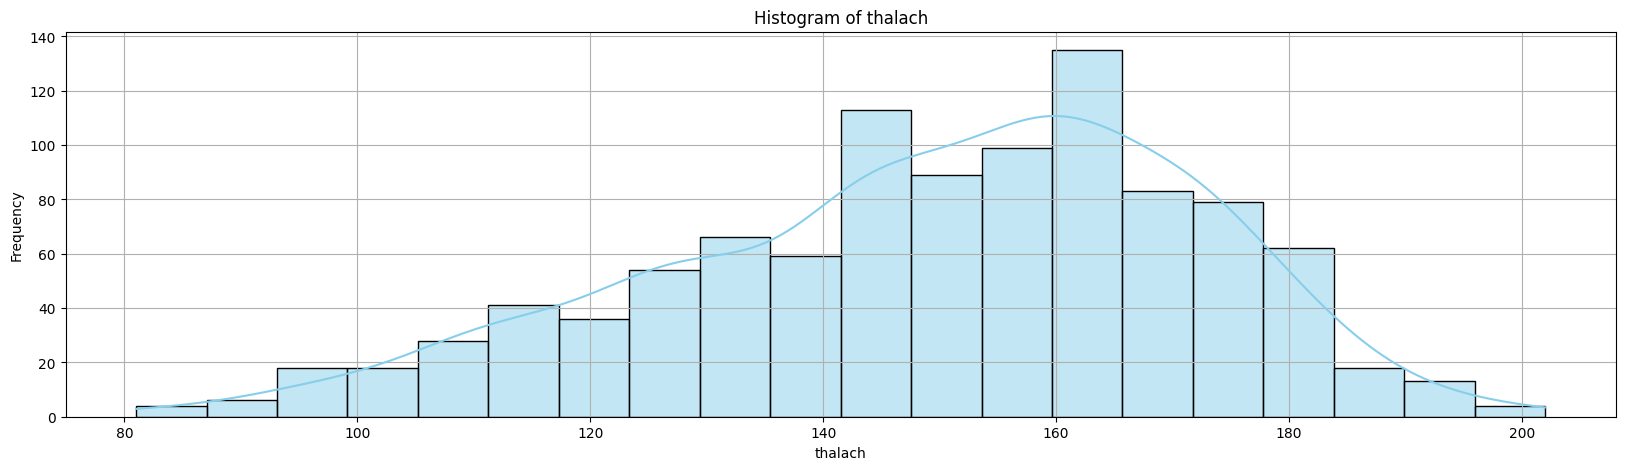

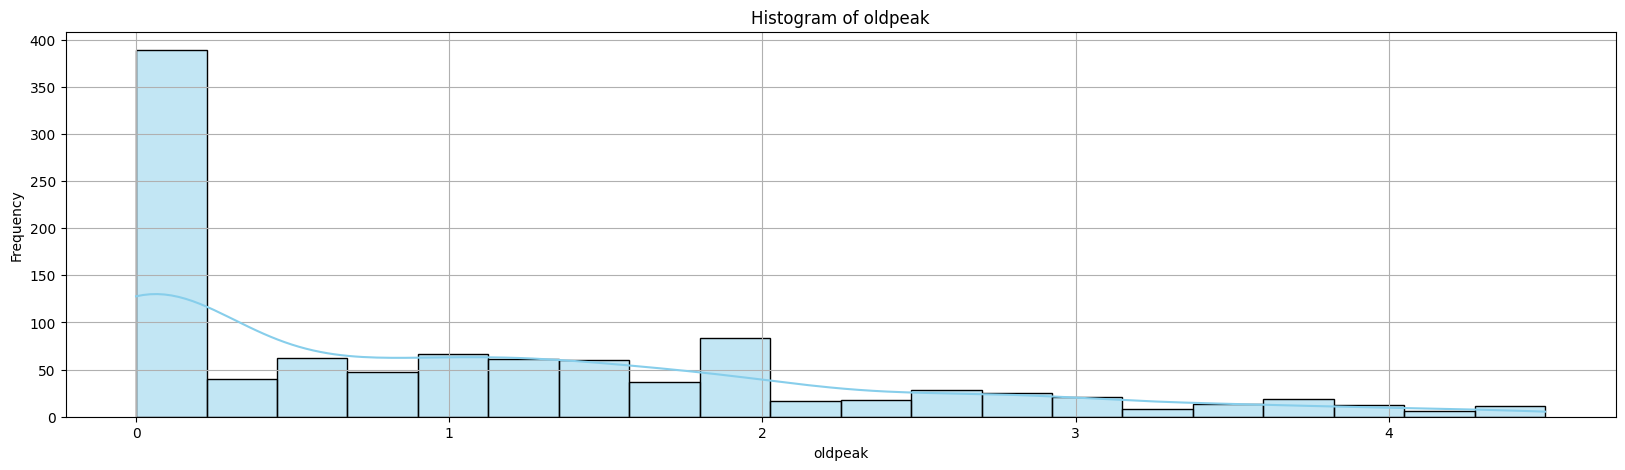

In [ ]:
# Mendeskripsikan distribusi data
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats


for kolom in numericals:
    # distribusi data menggunakan histogram
    plt.figure(figsize=(20, 5))
    sns.histplot(data[kolom], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

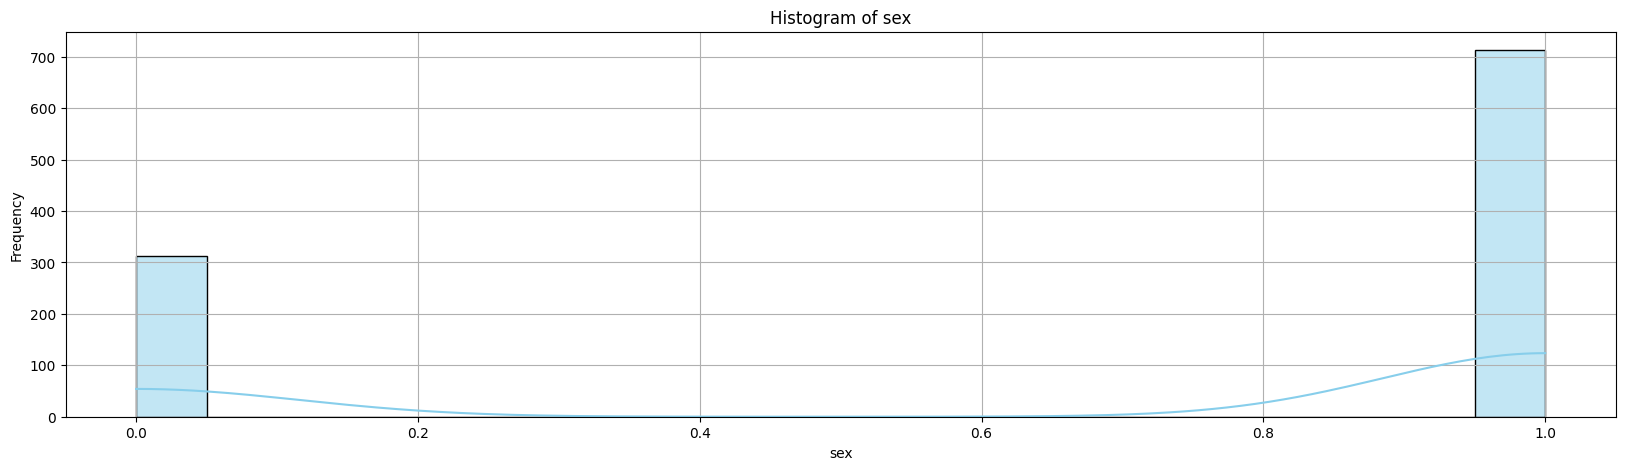

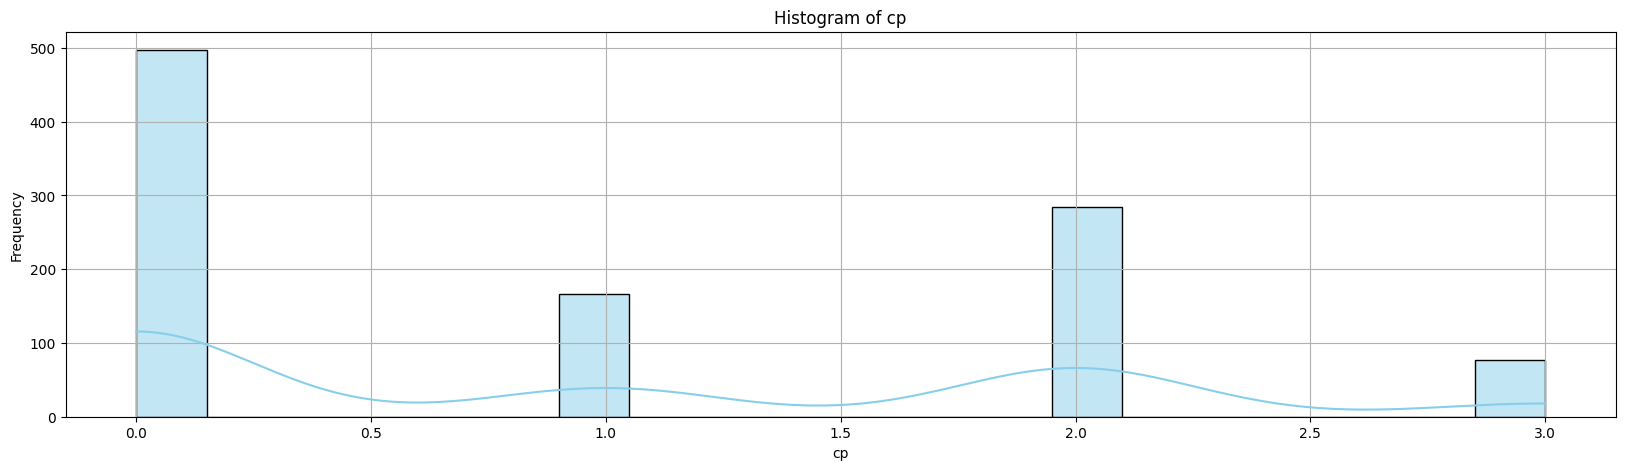

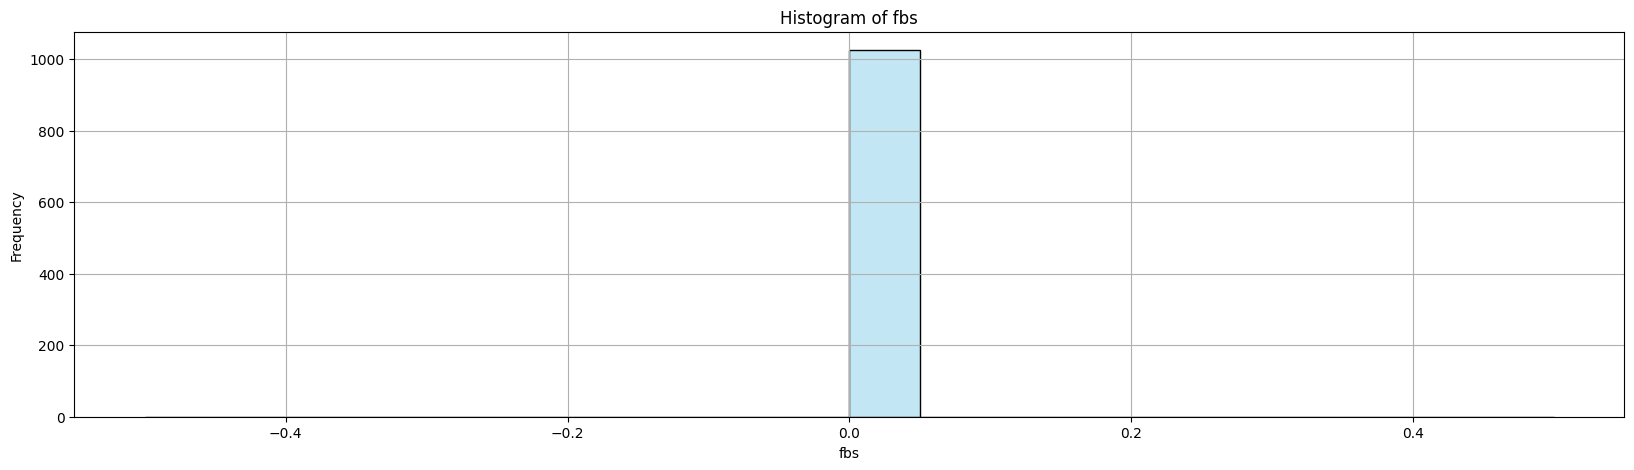

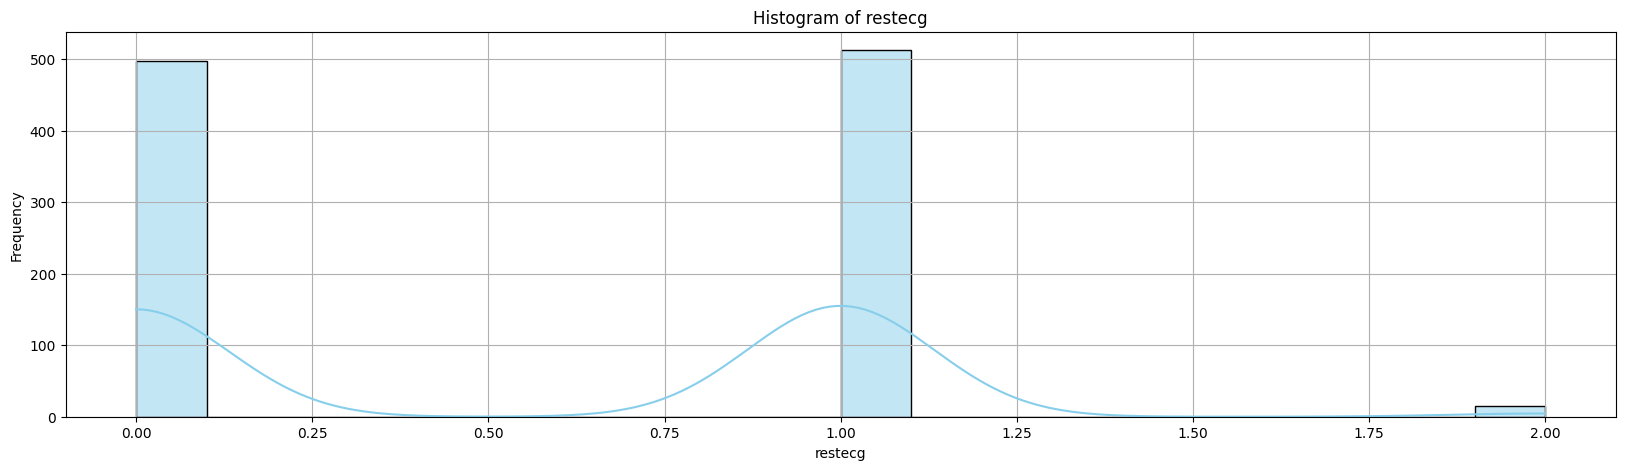

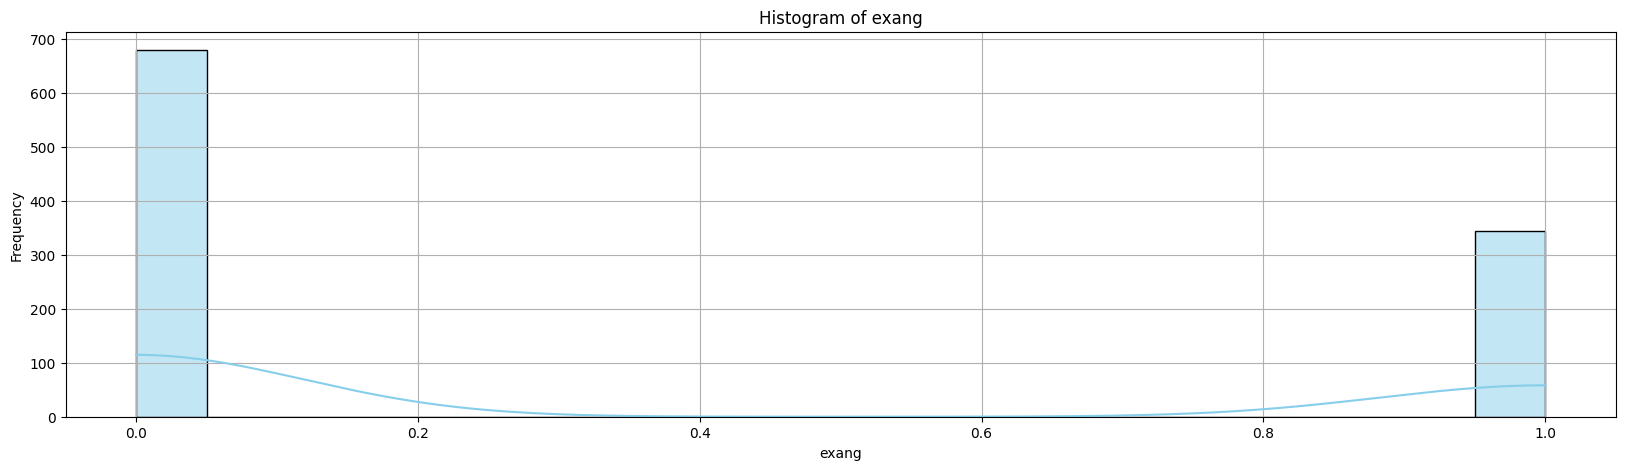

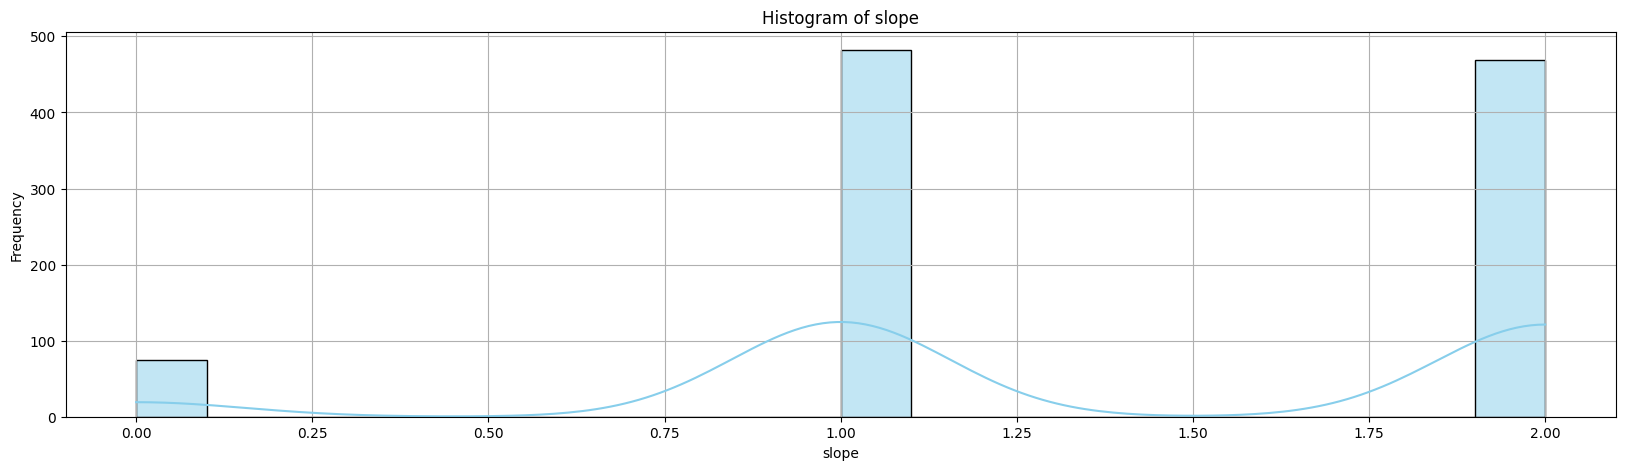

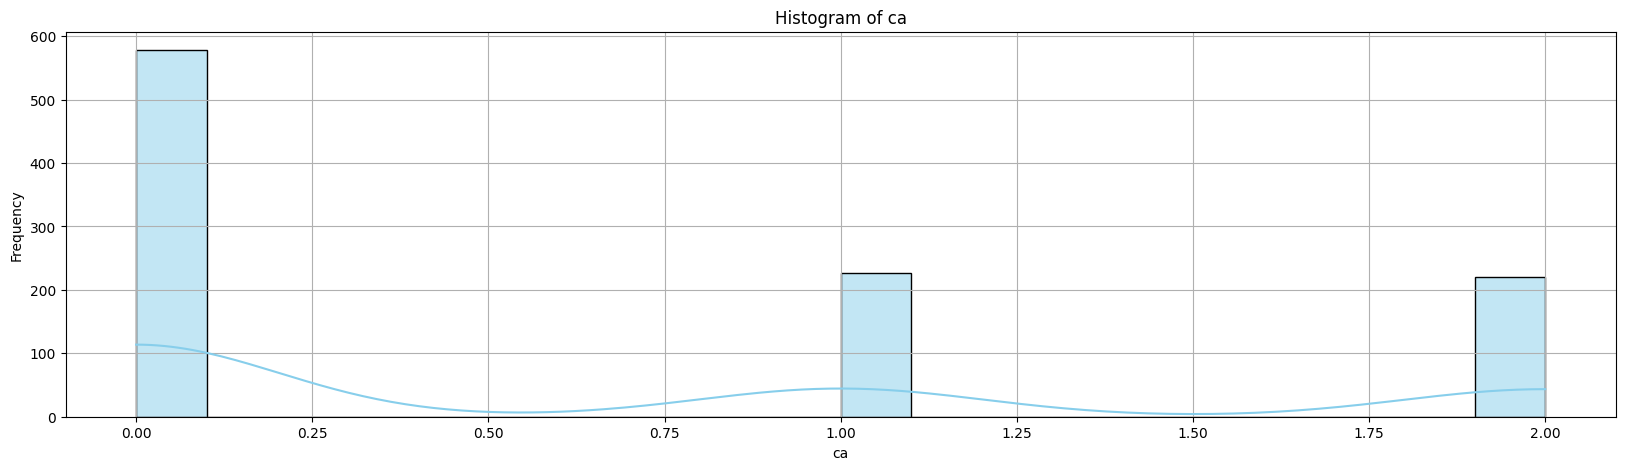

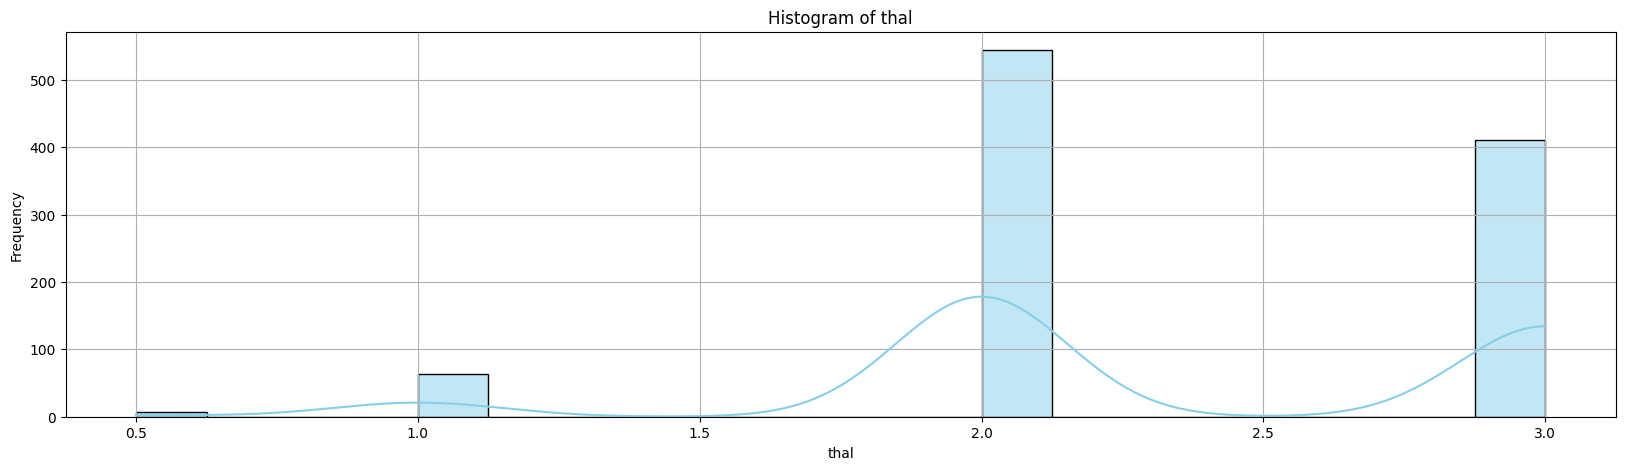

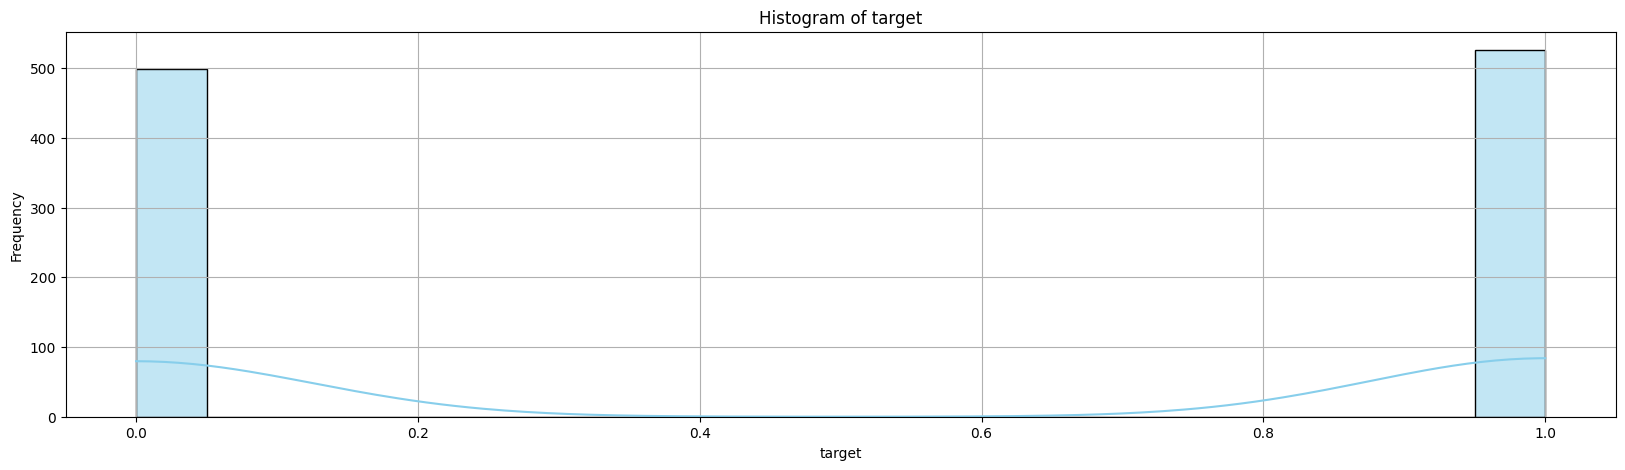

In [ ]:
# Mendeskripsikan distribusi data
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats


for kolom in nominals:
    # distribusi data menggunakan histogram
    plt.figure(figsize=(20, 5))
    sns.histplot(data[kolom], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 3. Feature Engineering

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada. Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

In [ ]:
# 1. Indeks Massa Tubuh (BMI)
data['BMI'] = data['chol'] / ((data['trestbps'] / 100) ** 2)
data['BMI'].head()

0    135.680000
1    103.571429
2     82.758621
3     92.677137
4    154.379332
Name: BMI, dtype: float64

In [ ]:
# 2. Status Berat Badan Berdasarkan BMI
def status_bmi(bmi):
  if bmi < 18.5:
    return ('Underweight')
  elif 18.5 <= bmi <= 24.9:
    return ('Normal')
  elif 25.0 <= bmi <= 29.9:
    return ('Overweight')
  else:
    return ('Obesity')

data['Status BMI'] = data['BMI'].apply(status_bmi)
data['Status BMI'].head()

0    Obesity
1    Obesity
2    Obesity
3    Obesity
4    Obesity
Name: Status BMI, dtype: object

In [ ]:
# 3. Frekuensi detak jantung maksimum yang diharapkan (bpm)
data['expected_max_heart_rate'] = 220 - data['age']
data['expected_max_heart_rate'].head()

0    168
1    167
2    150
3    159
4    158
Name: expected_max_heart_rate, dtype: int64

In [ ]:
#4. Rasio Denyut Jantung Maksimum Terhadap Usia dan Jenis Kelamin
data['thalach_age_sex_ratio'] = data['thalach'] / data['age'] * data['sex']
data['thalach_age_sex_ratio'].head()

0    3.230769
1    2.924528
2    1.785714
3    2.639344
4    0.000000
Name: thalach_age_sex_ratio, dtype: float64

In [ ]:
#5. Rasio Tekanan Darah Terhadap Kolesterol
data['trestbps_chol_ratio'] = data['trestbps'] / data['chol']
data['trestbps_chol_ratio'].head()

0    0.589623
1    0.689655
2    0.833333
3    0.729064
4    0.469388
Name: trestbps_chol_ratio, dtype: float64

In [ ]:
# 6. Rata-rata Tekanan Darah dalam 10 Menit Terakhir
data['mean_trestbps'] = data['trestbps'] / 10
data['mean_trestbps'].head()

0    12.5
1    14.0
2    14.5
3    14.8
4    13.8
Name: mean_trestbps, dtype: float64

In [ ]:
# 7. Jumlah Tekanan Darah Rendah (<120) dan Normal (>=120)
data['low_trestbps'] = data['trestbps'].apply(lambda x: 1 if x < 120 else 0)
data['normal_trestbps'] = data['trestbps'].apply(lambda x: 1 if x >= 120 else 0)
print("Tekanan darah rendah : ", data['low_trestbps'])
print("\n Tekanan darah rendah : ", data['normal_trestbps'])

Tekanan darah rendah :  0       0
1       0
2       0
3       0
4       0
       ..
1020    0
1021    0
1022    1
1023    1
1024    0
Name: low_trestbps, Length: 1025, dtype: int64

 Tekanan darah rendah :  0       1
1       1
2       1
3       1
4       1
       ..
1020    1
1021    1
1022    0
1023    0
1024    1
Name: normal_trestbps, Length: 1025, dtype: int64


In [ ]:
# 8. Jumlah Kolesterol Tinggi dan Normal
data['high_chol'] = data['chol'].apply(lambda x: 1 if x > 240 else 0)
data['normal_chol'] = data['chol'].apply(lambda x: 1 if 200 <= x <= 240 else 0)
print("Jumlah Kolesterol Tinggi : ", data['high_chol'])
print("\n Jumlah Kolesterol Rendah : ", data['normal_chol'])

Jumlah Kolesterol Tinggi :  0       0
1       0
2       0
3       0
4       1
       ..
1020    0
1021    1
1022    1
1023    1
1024    0
Name: high_chol, Length: 1025, dtype: int64

 Jumlah Kolesterol Rendah :  0       1
1       1
2       0
3       1
4       0
       ..
1020    1
1021    0
1022    0
1023    0
1024    0
Name: normal_chol, Length: 1025, dtype: int64


In [ ]:
# 9. Risiko Serangan Jantung
data['heart_attack_risk'] = data.apply(lambda x: 'Low' if (x['sex'] == 0 and x['age'] > 55) or (x['sex'] == 1 and x['age'] > 45) else 'High', axis=1)
data['heart_attack_risk'].head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: heart_attack_risk, dtype: object

In [ ]:
#10. Riwayat Merokok (1: Ya, 0: Tidak)
condition = (data['sex'] == 1) & (data['cp'] == 1)
data['smoking_history'] = condition.astype(int)

data['smoking_history']


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    0
1024    0
Name: smoking_history, Length: 1025, dtype: int64

Dataset setelah ditambah data baru.

In [ ]:
data.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,...,expected_max_heart_rate,thalach_age_sex_ratio,trestbps_chol_ratio,mean_trestbps,low_trestbps,normal_trestbps,high_chol,normal_chol,heart_attack_risk,smoking_history
0,1,52,1,0,125,212,0,1,168,0,...,168,3.230769,0.589623,12.5,0,1,0,1,Low,0
1,2,53,1,0,140,203,0,0,155,1,...,167,2.924528,0.689655,14.0,0,1,0,1,Low,0
2,3,70,1,0,145,174,0,1,125,1,...,150,1.785714,0.833333,14.5,0,1,0,0,Low,0
3,4,61,1,0,148,203,0,1,161,0,...,159,2.639344,0.729064,14.8,0,1,0,1,Low,0
4,5,62,0,0,138,294,0,1,106,0,...,158,0.000000,0.469388,13.8,0,1,1,0,Low,0


In [ ]:
# # 1. Kategori Umur (Muda, Dewasa, Tua)
# data['age_category'] = pd.cut(data['age'], bins=[0, 40, 60, 100], labels=['Muda', 'Dewasa', 'Tua'])
# data['age_category'].head()

# # 4. Risiko Penyakit Jantung berdasarkan CP (Angina)
# data['angina_risk'] = data['cp'].apply(lambda x: 'Low' if x == 0 else 'High')
# data['angina_risk'].head()

# #5. Risiko Penyakit Jantung berdasarkan ECG
# data['ecg_risk'] = data['restecg'].apply(lambda x: 'Low' if x == 0 else 'High')
# data['ecg_risk'].head()

# # 7. Status Diabetes
# data['diabetes_status'] = data['fbs'].map({0: 'Normal', 1: 'Tidak Normal'})
# data['diabetes_status'].head()

# # 9. Status Kesehatan Jantung
# data['heart_health_status'] = data['target'].map({0: 'Sehat', 1: 'Tidak Sehat'})
# data['heart_health_status'].head()

# # 10. Kategori Jenis Kelamin (Pria, Wanita)
# data['sex_category'] = data['sex'].map({0: 'Wanita', 1: 'Pria'})
# data['sex_category'].head()

# # 11. Kategori untuk pasien mengalami angina selama latihan
# data['exercise_induced_angina'] = data['exang'].map({0: 'No', 1: 'Yes'})
# data['exercise_induced_angina']

# #12. kemiringan (slope) dari segmen ST latihan puncak (peak exercise ST segment)
# data['slope_category'] = data['slope'].map({0: 'naik', 1: 'Flat', 2: 'turun'})
# data['slope_category'].head()

# # 13. Kategori CA (Jumlah Pembuluh Utama)
# data['ca_category'] = data['ca'].apply(lambda x: 'Tidak Ada' if x == 0 else 'Ada')
# data['ca_category'].head()

# # 14. Kategori Thal (Talasemia)
# data['thal_category'] = data['thal'].map({1: 'Normal', 2: 'Kekurangan', 3: 'Normal'})
# data['thal_category'].head()

